# Adapted from CS109a Introduction to Data Science
## Seminar 8, Exercise 4: Bagging vs Random Forest (Tree correlation)

## Description :

- How does Random Forest improve on Bagging?
    - The goal of this exercise is to investigate the correlation between randomly selected trees from Bagging and Random Forest.

## Instructions:

- Read the dataset `diabetes.csv` as a pandas dataframe, and take a quick look at the data.
- Split the data into train and validation sets.
- Define a `BaggingClassifier` model that uses `DecisionTreClassifier` as its base estimator.
- Specify the number of bootstraps as 1000 and a maximum depth of 3.
- Fit the `BaggingClassifier` model on the train data.
- Use the helper code to predict using the mean model and individual estimators. The plot will look similar to the one given below.
- Predict on the test data using the first estimator and the mean model.
- Compute and display the validation accuracy
- Repeat the modeling and classification process above, this time using a `RandomForestClassifier`.


<a href="https://www.kaggle.com/datasets/saurabh00007/diabetescsv" target="_blank">more about the data from kaggle</a>

## Hints:

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html" target="_blank">sklearn.train_test_split()</a>
Split arrays or matrices into random train and test subsets.

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html" target="_blank">sklearn.ensemble.BaggingClassifier()</a>
Returns a Bagging classifier instance.

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html" target="_blank">sklearn.tree.DecisionTreeClassifier()</a>
A Tree classifier can be used as the base model for the Bagging classifier.

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html" target="_blank">sklearn.ensemble.andomForestClassifier()</a>
Defines a Random forest classifier.

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html" target="_blank">sklearn.metrics.accuracy_score(y_true, y_pred)</a>
Accuracy classification score.

In [45]:
# !pip install -qq dtreeviz
import os, sys
# sys.path.append(f"{os.getcwd()}/../")
os.environ["PATH"] += os.pathsep + 'C:\\Program Files\\Graphviz\\bin\\'
# os.environ["PATH"] += os.pathsep + 'C:/ProgramData/Anaconda3/Library/bin/graphviz/'

In [46]:
# Import the main packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from dtreeviz.trees import dtreeviz
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier


%matplotlib inline

colors = [None,  # 0 classes
          None,  # 1 class
          ['#FFF4E5','#D2E3EF'],# 2 classes
           ]

from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))


In [47]:
# Read the dataset and take a quick look
df = pd.read_csv("C:\\Users\\wirze\\DataspellProjects\\DS_DAPS\\8-lab\\data\\diabetes.csv")
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [48]:
# Assign the predictor and response variables.
# "Outcome" is the response and all the other columns are the predictors
X = df.drop(['Outcome'], axis=1)
y = df['Outcome']


In [49]:
# Fix a random_state
random_state = 144

# Split the data into train and validation sets with 80% train size
# and the above set random state
X_train, X_val, y_train,y_val = train_test_split(X, y)


## Bagging Implementation

In [50]:
help(BaggingClassifier)

Help on class BaggingClassifier in module sklearn.ensemble._bagging:

class BaggingClassifier(sklearn.base.ClassifierMixin, BaseBagging)
 |  BaggingClassifier(base_estimator=None, n_estimators=10, *, max_samples=1.0, max_features=1.0, bootstrap=True, bootstrap_features=False, oob_score=False, warm_start=False, n_jobs=None, random_state=None, verbose=0)
 |  
 |  A Bagging classifier.
 |  
 |  A Bagging classifier is an ensemble meta-estimator that fits base
 |  classifiers each on random subsets of the original dataset and then
 |  aggregate their individual predictions (either by voting or by averaging)
 |  to form a final prediction. Such a meta-estimator can typically be used as
 |  a way to reduce the variance of a black-box estimator (e.g., a decision
 |  tree), by introducing randomization into its construction procedure and
 |  then making an ensemble out of it.
 |  
 |  This algorithm encompasses several works from the literature. When random
 |  subsets of the dataset are drawn

In [51]:
# Define a Bagging classifier with randon_state as above
# and with a DecisionClassifier as a basemodel
# Fix the max_depth variable to 20 for all trees
max_depth = 20

# Set the 100 estimators
n_estimators = 100

# Initialize the Decision Tree classsifier with the set max depth and
# random state
basemodel = DecisionTreeClassifier(max_depth = max_depth, random_state  = random_state)

# Initialize a Bagging classsifier with the Decision Tree as the base and
# estimator and the number of estimator defined above
bagging = BaggingClassifier(base_estimator = basemodel, n_estimators =n_estimators)

# Fit the Bagging model on the training set
bagging.fit(X_train, y_train)


BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=20,
                                                        random_state=144),
                  n_estimators=100)

In [52]:
# Use the trained model to predict on the validation data
predictions = bagging.predict(X_val)

# Compute the accuracy on the validation set
acc_bag = round(accuracy_score(predictions, y_val),2)

# Print the validation data accuracy
print(f'For Bagging, the accuracy on the validation set is {acc_bag}')


For Bagging, the accuracy on the validation set is 0.77


## Random Forest implementation

In [53]:
# Define a Random Forest classifier with random_state as defined above
#  and set the maximum depth to be max_depth and use 100 estimators
random_forest = RandomForestClassifier(random_state=random_state,
                                       max_depth=max_depth,
                                       n_estimators=n_estimators)

# Fit the model on the training set
random_forest.fit(X_train, y_train)


RandomForestClassifier(max_depth=20, random_state=144)

In [54]:
# Use the trained Random Forest model to predict on the validation data
predictions = random_forest.predict(X_val)

# Compute the accuracy on the validation set
acc_rf = round(accuracy_score(predictions, y_val),2)

# Print the validation data accuracy
print(f'For Random Forest, the accuracy on the validation set is {acc_rf}')


For Random Forest, the accuracy on the validation set is 0.78


## Visualizing the trees - Bagging

In [55]:
# Helper code to visualize the Bagging tree
# Reduce the max_depth for better visualization
max_depth = 3

basemodel = DecisionTreeClassifier(max_depth=max_depth,
                                random_state=random_state)

bagging = BaggingClassifier(base_estimator=basemodel,
                                n_estimators=1000)

# Fit the model on the training set
bagging.fit(X_train, y_train)

# Selecting two trees at random
bagvati1 = bagging.estimators_[0]
bagvati2 = bagging.estimators_[100]


<center> <h2> <i> Bagging Tree 1 </h2> </center>

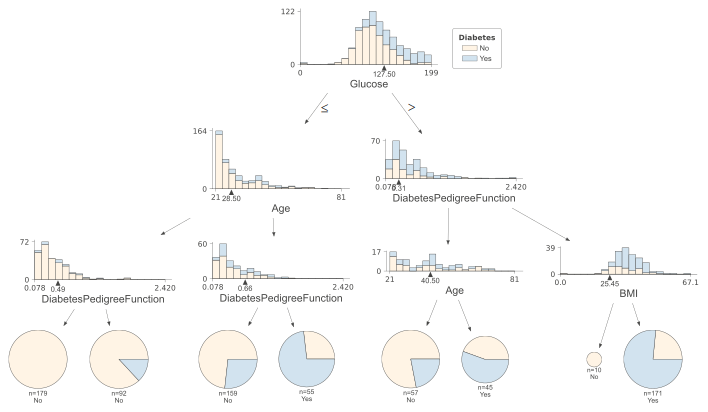

In [56]:
vizA = dtreeviz(bagvati1, df.iloc[:,:8],df.Outcome,
               feature_names = df.columns[:8],
               target_name = 'Diabetes', class_names= ['No','Yes']
              ,orientation = 'TD',
               colors={'classes':colors},
               label_fontsize=14,
               ticks_fontsize=10,
               )
printmd('<center> <h2> <i> Bagging Tree 1 </h2> </center>')
vizA

<center> <h2> <i> Bagging Tree 2 </h2> </center>

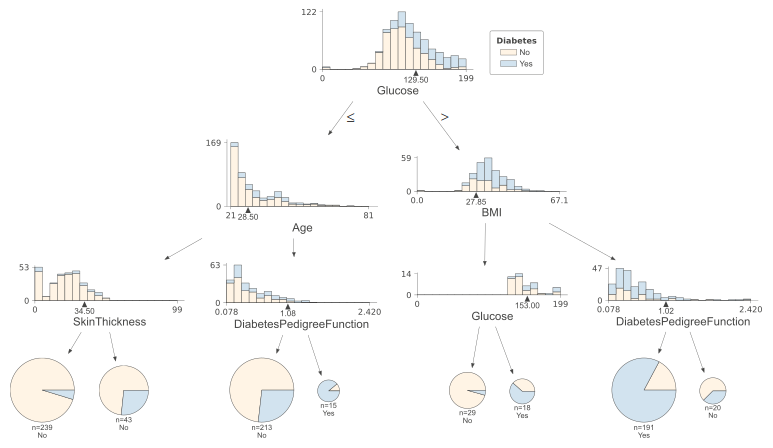

In [57]:
vizB = dtreeviz(bagvati2, df.iloc[:,:8],df.Outcome,
               feature_names = df.columns[:8],
               target_name = 'Diabetes', class_names= ['No','Yes']
              ,orientation = 'TD',
               colors={'classes':colors},
               label_fontsize=14,
               ticks_fontsize=10,
                scale=1.1
               )
printmd('<center> <h2> <i> Bagging Tree 2 </h2> </center>')
vizB

## Visualizing the trees - Random Forest

In [58]:
# Helper code to visualize the Random Forest tree

# Reduce the max_depth for visualization
max_depth = 3
random_forest = RandomForestClassifier(max_depth=max_depth, random_state=random_state, n_estimators=1000,max_features = "sqrt")

# Fit the model on the training set
random_forest.fit(X_train, y_train)

# Selecting two trees at random
forestvati1 = random_forest.estimators_[0]
forestvati2 = random_forest.estimators_[100]


<center> <h2> <i> Random Forest Tree 1 </h2> </center>

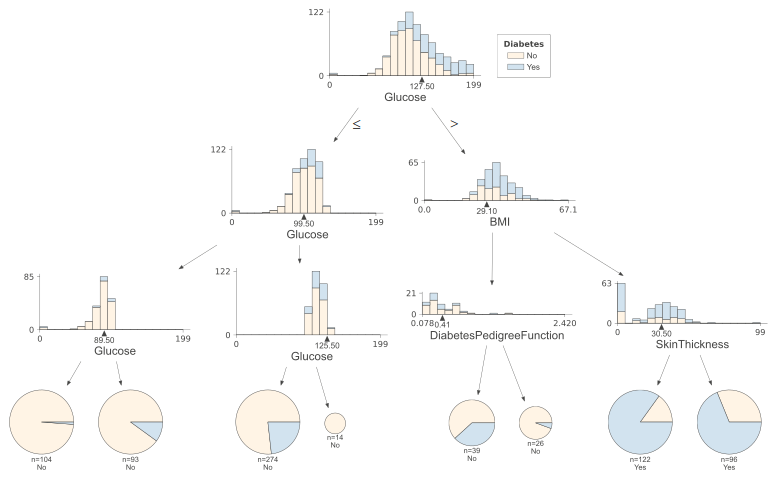

In [59]:
vizC = dtreeviz(forestvati1, df.iloc[:,:8],df.Outcome,
               feature_names = df.columns[:8],
               target_name = 'Diabetes', class_names= ['No','Yes']
              ,orientation = 'TD',
               colors={'classes':colors},
               label_fontsize=14,
               ticks_fontsize=10,
                scale=1.1
               )
printmd('<center> <h2> <i> Random Forest Tree 1 </h2> </center>')
vizC

<center> <h2> <i> Random Forest Tree 2 </h2> </center>

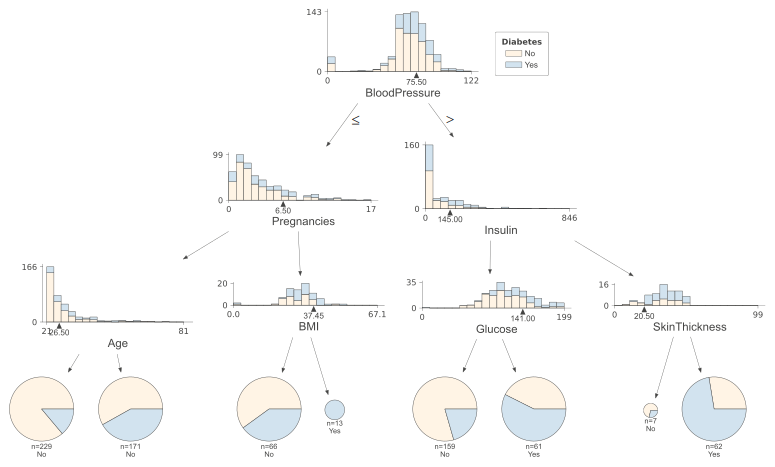

In [60]:
vizD = dtreeviz(forestvati2, df.iloc[:,:8],df.Outcome,
               feature_names = df.columns[:8],
               target_name = 'Diabetes', class_names= ['No','Yes']
              ,orientation = 'TD',
               colors={'classes':colors},
               label_fontsize=14,
               ticks_fontsize=10,
                scale=1.1
               )
printmd('<center> <h2> <i> Random Forest Tree 2 </h2> </center>')
vizD